## Get the data

### Download the data

In [2]:
# downloading data function
import os
import urllib.request
import tarfile
import pandas as pd
import matplotlib.pyplot as plt

dataset_folder = '/Users/dvorasindmitrij/PycharmProjects/pythonProject/datasets'

def download_data(url, filename, folder):
    # create folder for dataset
    path = os.path.join(dataset_folder, folder)
    print('path: ' + path)
    os.makedirs(path, exist_ok=True)
    
    # path of local file
    full_path = os.path.join(path, filename)
    print('full path: ' + full_path)
    
    # full url of donwloaded file
    full_url = url + folder + '/' + filename
    print('full url: ' + full_url)
    
    urllib.request.urlretrieve(full_url, full_path) # downloading
    
    archive = tarfile.open(full_path, "r:gz")
    archive.extractall(path=path)
    archive.close()

In [3]:
url = 'https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/'
filename = 'housing.tgz'
folder = 'housing'
download_data(url, filename, folder)

path: /Users/dvorasindmitrij/PycharmProjects/pythonProject/datasets/housing
full path: /Users/dvorasindmitrij/PycharmProjects/pythonProject/datasets/housing/housing.tgz
full url: https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.tgz


In [4]:
csv_path = os.path.join(dataset_folder, folder) + '/housing.csv'
df = pd.read_csv(csv_path)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Explore the data

In [5]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


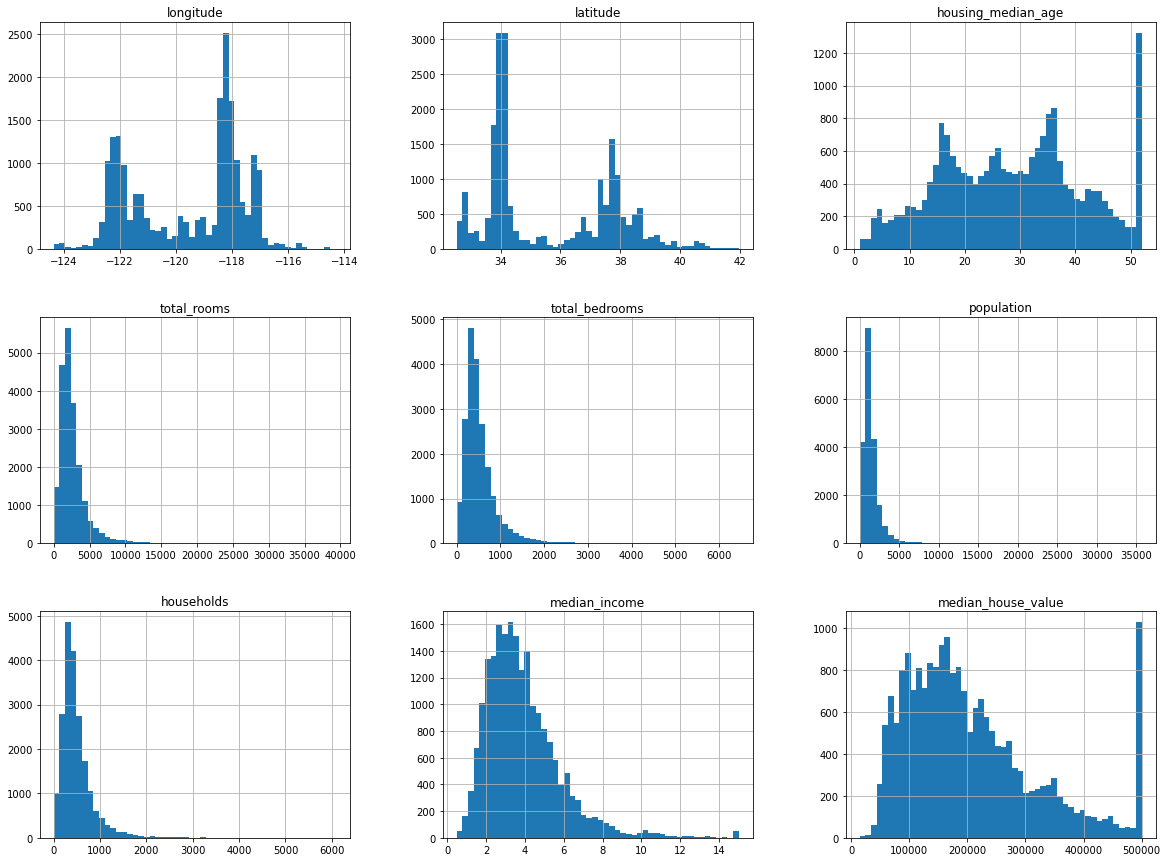

In [7]:
df.hist(bins=50, figsize=(20,15))
plt.show()

### Test set

In [8]:
# create test set using train_test_split
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
print(str(len(df_train)) + ' ' + str(len(df_test)))

16512 4128


In [13]:
# add bins by median_income
import numpy as np
df['bin_income'] = pd.cut(df['median_income'],
                          bins=[0, 1.5, 3.0, 4.5, 6.0, np.inf],
                          labels=[1, 2, 3, 4, 5])
df.groupby('bin_income').agg('count')['longitude']

bin_income
1     822
2    6581
3    7236
4    3639
5    2362
Name: longitude, dtype: int64

In [17]:
# create stratified test set using StratifiedShuffleSplit
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_ind, test_ind in sss.split(df, df['bin_income']):
    df_train = df.loc[train_ind]
    df_test = df.loc[test_ind]

df_train.drop('bin_income', axis=1, inplace=True)
df_test.drop('bin_income', axis=1, inplace=True)
    
print(str(len(df_train)) + ' ' + str(len(df_test)))

16512 4128


## Gain insights

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

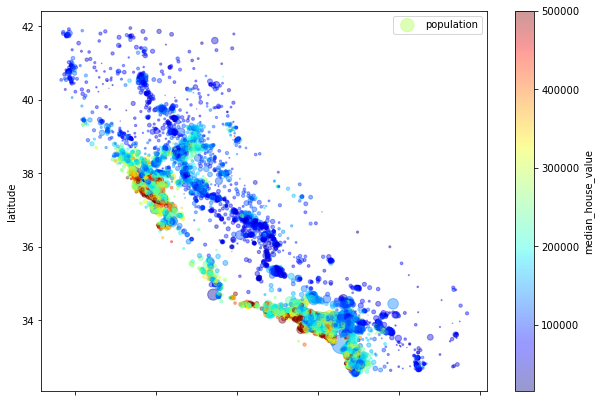

In [41]:
# plot longitude, latitude, population and median_house_value with scatter plot
df_train.plot(kind='scatter', x='longitude', y='latitude', figsize=(10,7), label='population',
              alpha=0.4, s=df_train['population']/100, c='median_house_value', cmap='jet')

### Correlations

In [42]:
# find the most correlated with median_house_value features
corr_matrix = df_train.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

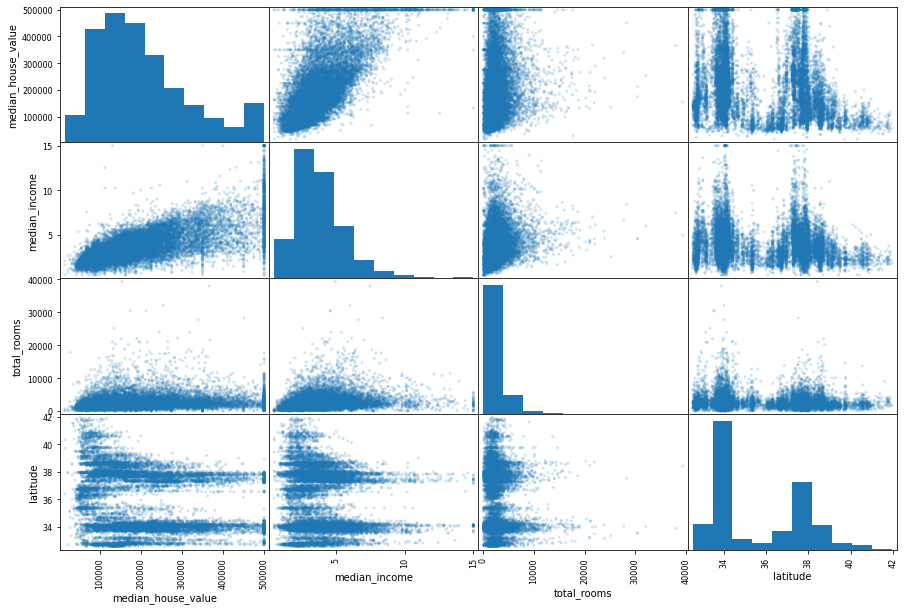

In [50]:
# build graph of most correlated features
pd.plotting.scatter_matrix(df_train[['median_house_value', 'median_income', 'total_rooms', 'latitude']], 
                           figsize=(15,10), alpha=0.2)
plt.show()

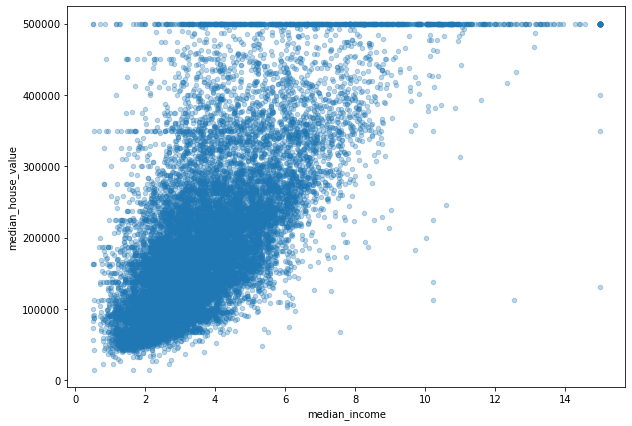

In [59]:
# zoom in on the strangest
df_train.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.3, figsize=(10,7))
plt.show()

### Add new features

In [62]:
df_train['rooms_per_household'] = df_train['total_rooms']/df_train['households']
df_train['bedrooms_per_room'] = df_train['total_bedrooms']/df_train['total_rooms']
df_train['population_per_household'] = df_train['population']/df_train['households']
df_train.corr()['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

## Prepare the data

In [63]:
# getting train/test sets once again
for train_ind, test_ind in sss.split(df, df['bin_income']):
    df_train = df.loc[train_ind]
    df_test = df.loc[test_ind]

df_train.drop('bin_income', axis=1, inplace=True)
df_test.drop('bin_income', axis=1, inplace=True)

housing = df_train.drop('median_house_value', axis=1)
housing_labels = df_train['median_house_value'].copy()

### Data Cleaning

In [80]:
# use imputer and fill missing values with medians
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
housing_num = housing.drop('ocean_proximity', axis=1)
imputer.fit(housing_num)
housing_imp = pd.DataFrame(imputer.transform(housing_num), 
                           index=housing_num.index, 
                           columns=housing_num.columns)
housing_imp['ocean_proximity'] = housing['ocean_proximity'].copy()
housing_imp.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN


### Handling Text and Categorical Attributes

In [82]:
# OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
housing_cat = housing[['ocean_proximity']]
ord_enc = OrdinalEncoder()
ord_enc.fit(housing_cat)
ord_enc.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [84]:
ord_enc.transform(housing_cat) # not the best option of encoding

array([[0.],
       [0.],
       [4.],
       ...,
       [1.],
       [0.],
       [3.]])

In [92]:
# OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
ohe.fit(housing_cat[['ocean_proximity']])
ohe.transform(housing_cat).toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [93]:
ohe.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [104]:
ohe_columns = [x.lower() for x in ohe.get_feature_names(['ocean_proximity'])]
ohe_columns = [x.replace(' ', '_').replace('<', '') for x in ohe_columns]
ohe_columns

['ocean_proximity_1h_ocean',
 'ocean_proximity_inland',
 'ocean_proximity_island',
 'ocean_proximity_near_bay',
 'ocean_proximity_near_ocean']

In [106]:
housing_cat_enc = pd.DataFrame(ohe.transform(housing_cat).toarray(),
                               index=housing_cat.index,
                               columns=ohe_columns)
housing_cat_enc.head()

,ocean_proximity_1h_ocean,ocean_proximity_inland,ocean_proximity_island,ocean_proximity_near_bay,ocean_proximity_near_ocean
17606,1.0,0.0,0.0,0.0,0.0
18632,1.0,0.0,0.0,0.0,0.0
14650,0.0,0.0,0.0,0.0,1.0
3230,0.0,1.0,0.0,0.0,0.0
3555,1.0,0.0,0.0,0.0,0.0


### Custom Transformers

In [109]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

In [ ]:
# write custom transformer with BaseEstimator and TransformerMixin as base classes
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, pops_ix, households_ix = 3, 4, 5, 6

class TransformerPipeline(BaseEstimator, TransformerMixin):
    #def __init__(self, add_bedrooms_per_room=True):
    #    self.add_bedrooms_per_room = add_bedrooms_per_room
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, columns, num_ix, cat_ix):
        # add features
        bedrooms_per_rooms = X[:, bedrooms_ix]/X[:, rooms_ix]
        rooms_per_household = X[:, rooms_ix]/X[:, household_ix]
        pops_per_household = X[:, pops_ix]/X[:, household_ix]
        X_f = np.c_(X, bedrooms_per_rooms, rooms_per_household, pops_per_household)
        
        X_num = X[:, num_ix]
        X_cat = X[:, cat_ix]
        
        # impute
        
        
        # encoding
        
        

### Feature Scaling

### Transformation Pipelines

## Select and Train a Model

## Fine-tune Model